In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from utils.dataframe import get_final_dataframe

df = get_final_dataframe("random_forest")

2025-05-11 10:13:40,225 - data_processing.data_preprocessing - INFO - Applied one-hot encoding to ['surface', 'tourney_level', 'winner_entry', 'loser_entry', 'winner_hand', 'loser_hand']
2025-05-11 10:13:40,793 - data_processing.data_preprocessing - INFO - Columns successfully dropped -> ['tourney_name', 'tourney_id', 'match_num', 'winner_name', 'loser_name', 'score', 'best_of', 'round', 'minutes', 'w_ace', 'l_ace', 'w_df', 'l_df', 'w_svpt', 'l_svpt', 'w_1stIn', 'l_1stIn', 'w_1stWon', 'l_1stWon', 'w_2ndWon', 'l_2ndWon', 'w_SvGms', 'l_SvGms', 'w_bpSaved', 'l_bpSaved', 'w_bpFaced', 'l_bpFaced', 'Unnamed: 0', 'loser_entry_S']
2025-05-11 10:13:40,854 - data_processing.data_preprocessing - INFO - 89263 rows dropped
2025-05-11 10:13:41,339 - utils.dataframe - INFO - 52918 winners assigned to player 1
2025-05-11 10:13:41,340 - utils.dataframe - INFO - 52815 winners assigned to player 2
2025-05-11 10:13:41,674 - data_processing.feature_engineering - INFO - Applying feature engineering


In [2]:
last_n_matches = [5, 10, 20, 50]

columns_to_remove = [
    "tourney_level_O", "player_1_entry_ITF", "player_1_entry_UP",
    "player_1_entry_W", "player_2_entry_ITF", "player_2_entry_UP",
    "player_2_entry_W", "player_1_id", "player_2_id"
] + ["player_1_surface_elo", "player_2_surface_elo", "player_1_elo",
     "player_2_elo", "player_1_age", "player_2_age", "player_1_ht", "player_2_ht",
     "player_1_rank_points", "player_2_rank_points", "player_1_rank", "player_2_rank",
     "player_1_seed", "player_2_seed", "player_1_win_ratio", "player_2_win_ratio", "player_1_h2h_won", "player_2_h2h_won", "player_1_won_match", "player_2_won_match",
     "player_1_total_match", "player_2_total_match"] + (
    [f"player_1_last_{num}_win_ratio" for num in last_n_matches] +
    [f"player_2_last_{num}_win_ratio" for num in last_n_matches] +
    [f"player_1_last_{num}_match_won" for num in last_n_matches] +
    [f"player_2_last_{num}_match_won" for num in last_n_matches])


df = df.drop(columns=[column for column in columns_to_remove], errors="ignore")
# df = df.drop(columns=[column for column in df.columns if "progress" in column])

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 105733 entries, 0 to 105538
Data columns (total 63 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   player_1_ioc                   105733 non-null  int64  
 1   player_1_entry_ALT             105733 non-null  bool   
 2   player_1_entry_Alt             105733 non-null  bool   
 3   player_1_entry_LL              105733 non-null  bool   
 4   player_1_entry_PR              105733 non-null  bool   
 5   player_1_entry_Q               105733 non-null  bool   
 6   player_1_entry_SE              105733 non-null  bool   
 7   player_1_entry_WC              105733 non-null  bool   
 8   player_1_hand_L                105733 non-null  bool   
 9   player_1_hand_R                105733 non-null  bool   
 10  player_1_was_seeded            105733 non-null  bool   
 11  player_2_ioc                   105733 non-null  int64  
 12  player_2_entry_ALT             1057

In [4]:
x = df.drop("player_1_won", axis=1)
y = df["player_1_won"]

In [44]:
split_year = 2022

x_train = df[df["tourney_year"] < split_year].drop("player_1_won", axis=1)
y_train = df[df["tourney_year"] < split_year]["player_1_won"]

x_test = df[df["tourney_year"] == split_year].drop("player_1_won", axis=1)
y_test = df[df["tourney_year"] == split_year]["player_1_won"]

# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.03, shuffle=False)

In [45]:
x_train.tail()

,player_1_ioc,player_1_entry_ALT,player_1_entry_Alt,player_1_entry_LL,player_1_entry_PR,player_1_entry_Q,player_1_entry_SE,player_1_entry_WC,player_1_hand_L,player_1_hand_R,...,elo_diff,surface_elo_diff,player_1_last_5_elo_progress,player_2_last_5_elo_progress,player_1_last_10_elo_progress,player_2_last_10_elo_progress,player_1_last_20_elo_progress,player_2_last_20_elo_progress,player_1_last_50_elo_progress,player_2_last_50_elo_progress
96852,62,False,False,False,False,False,False,False,False,True,...,388.783529,406.579936,0.994657,0.989698,1.005164,1.019310,0.999011,1.008830,1.007500,1.036396
96859,16,False,False,False,False,False,False,False,True,False,...,-185.330405,-234.107573,1.024608,0.996769,1.007383,0.966305,1.021851,0.947410,1.058700,0.926947
96860,30,False,False,False,False,False,False,False,False,True,...,387.749876,405.098214,1.000225,0.990716,1.013723,1.017396,1.025981,0.987131,1.037150,0.960577
96857,30,False,False,False,False,False,False,False,False,True,...,298.011394,279.899788,0.990128,1.010541,0.978270,1.010342,0.953640,1.010342,0.927520,1.010342
96858,17,False,False,False,False,False,False,False,False,True,...,-297.050506,-350.916553,0.980002,0.997603,1.009264,1.008306,1.008780,1.025771,1.040699,1.036395


array([[<Axes: title={'center': 'player_1_ioc'}>,
        <Axes: title={'center': 'player_2_ioc'}>,
        <Axes: title={'center': 'draw_size'}>,
        <Axes: title={'center': 'tourney_year'}>,
        <Axes: title={'center': 'tourney_month'}>,
        <Axes: title={'center': 'tourney_day'}>],
       [<Axes: title={'center': 'rank_diff'}>,
        <Axes: title={'center': 'rank_points_diff'}>,
        <Axes: title={'center': 'seed_diff'}>,
        <Axes: title={'center': 'height_diff'}>,
        <Axes: title={'center': 'age_diff'}>,
        <Axes: title={'center': 'h2h_diff'}>],
       [<Axes: title={'center': 'total_match_diff'}>,
        <Axes: title={'center': 'won_match_diff'}>,
        <Axes: title={'center': 'last_5_match_diff'}>,
        <Axes: title={'center': 'last_10_match_diff'}>,
        <Axes: title={'center': 'last_20_match_diff'}>,
        <Axes: title={'center': 'last_50_match_diff'}>],
       [<Axes: title={'center': 'win_ratio_diff'}>,
        <Axes: title={'center'

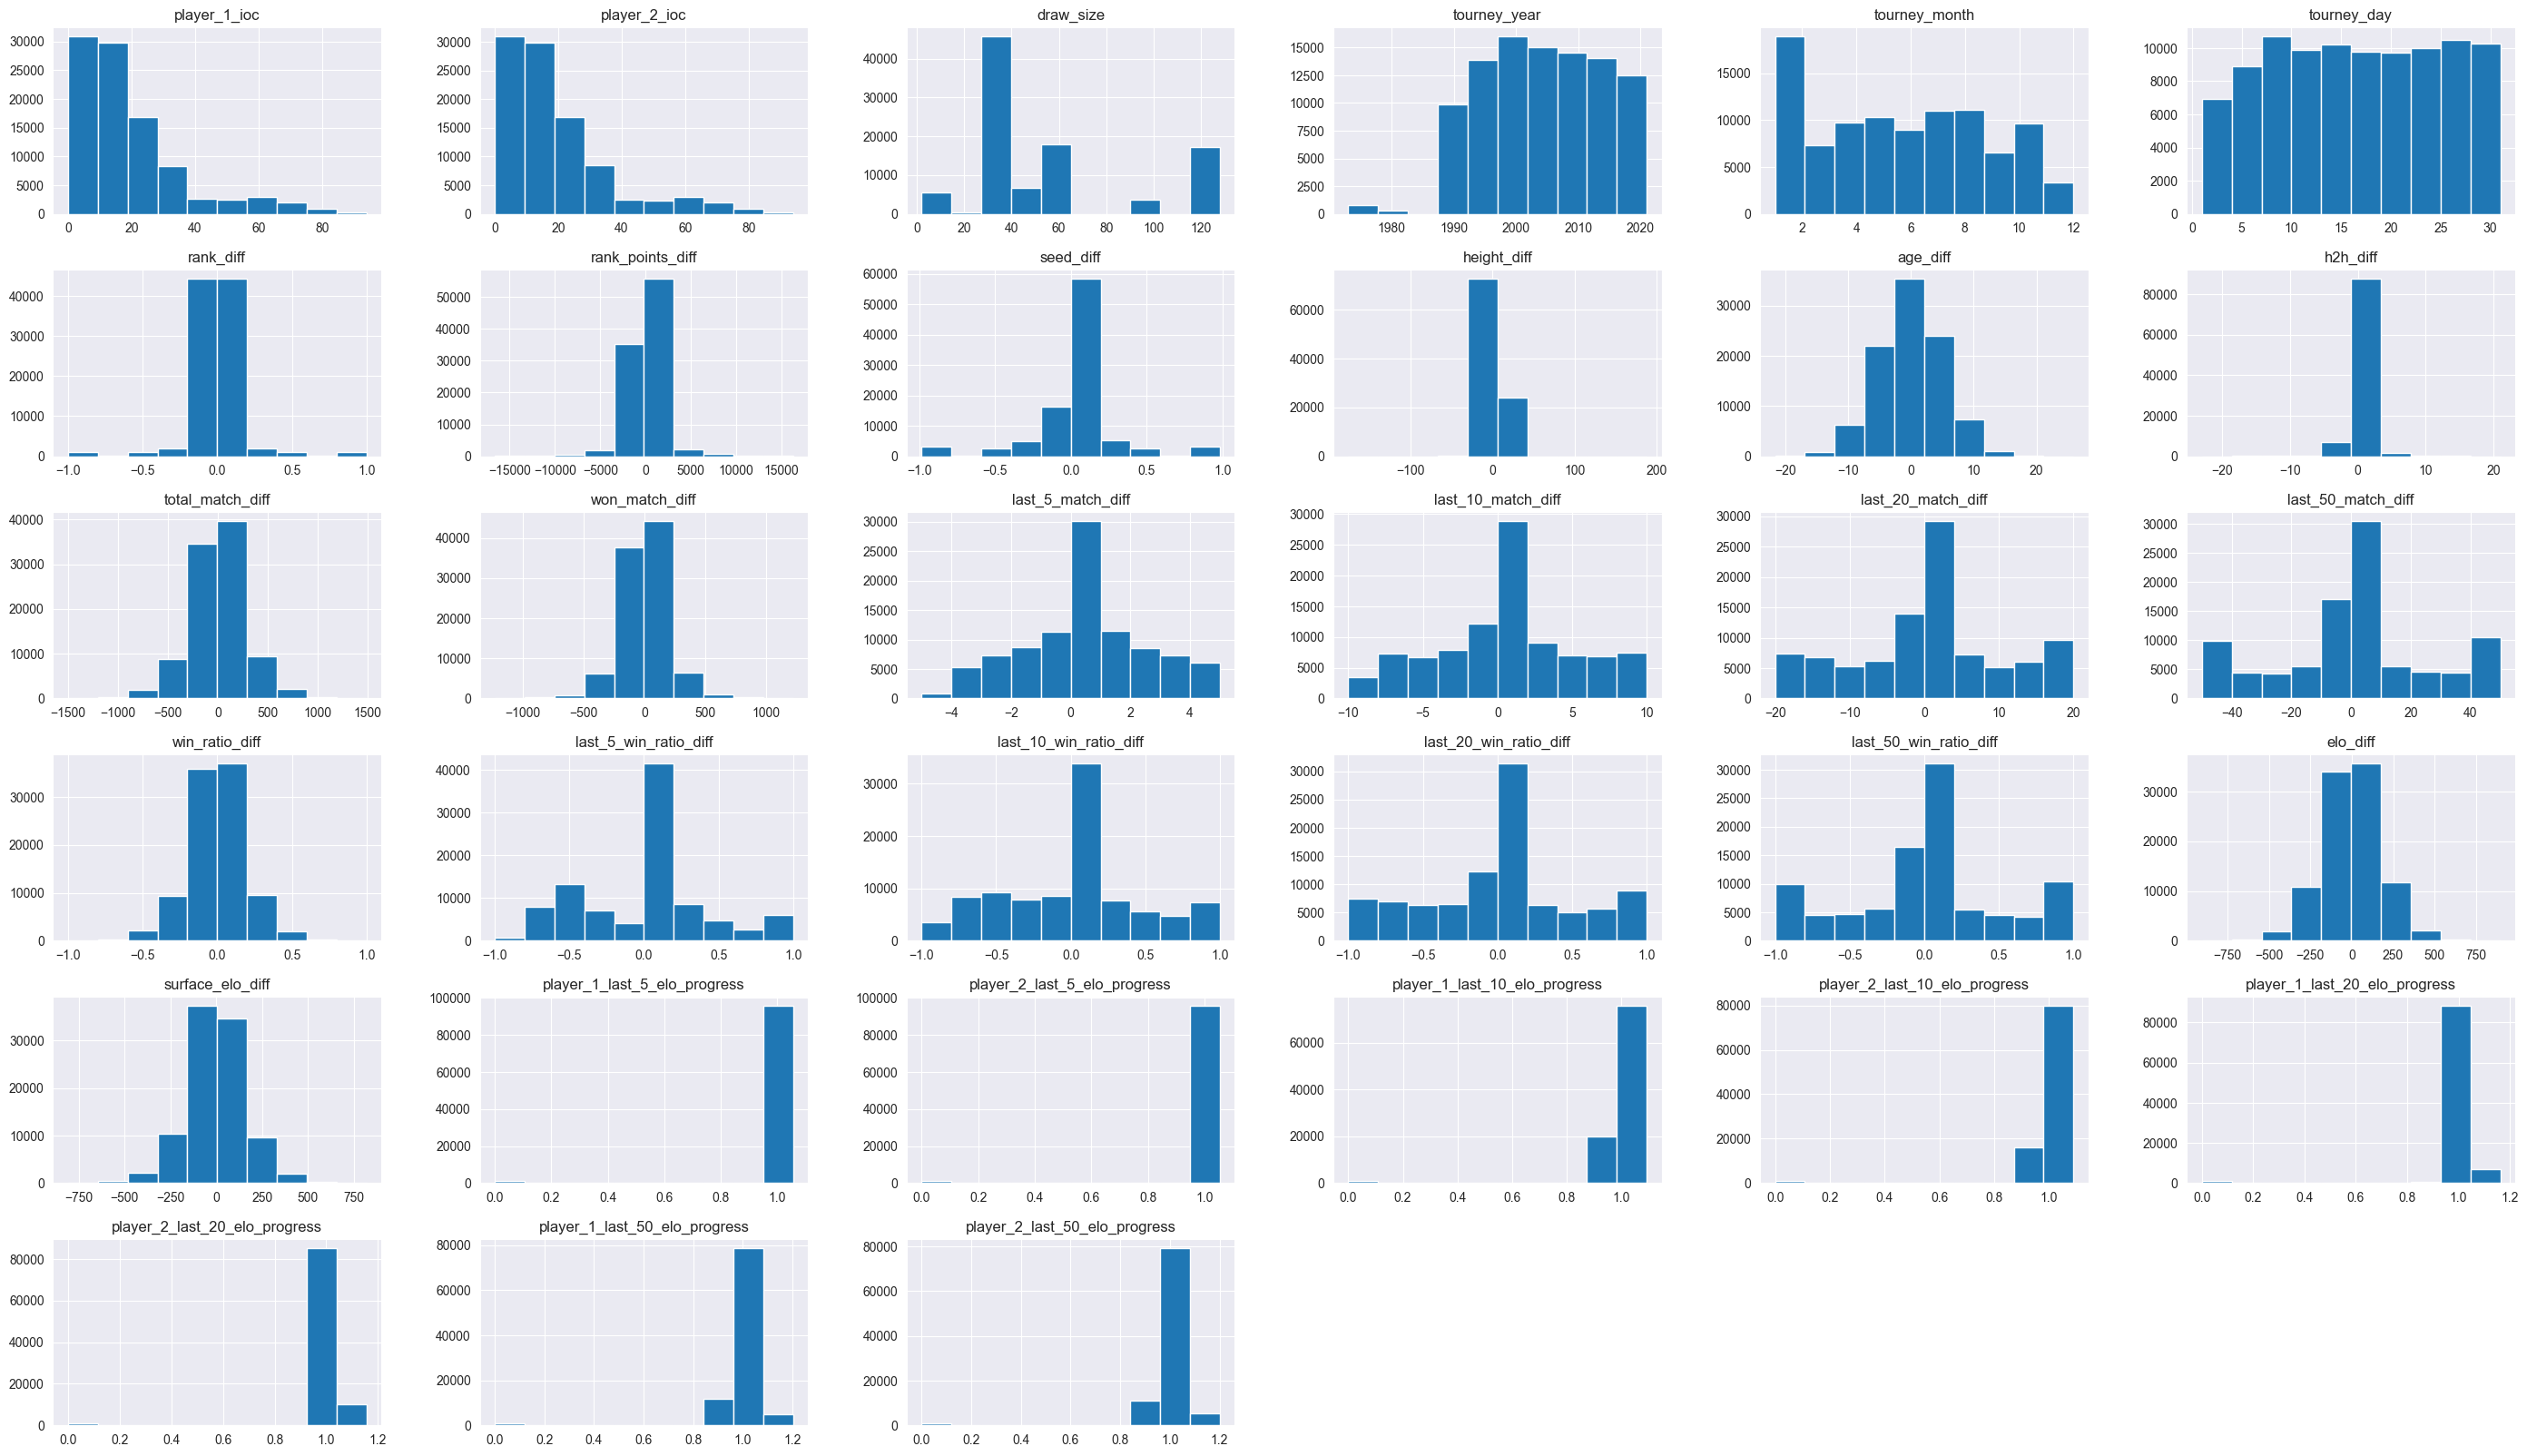

In [46]:
train_data = x_train.join(y_train)
train_data.hist(figsize=(35, 20))

<Axes: >

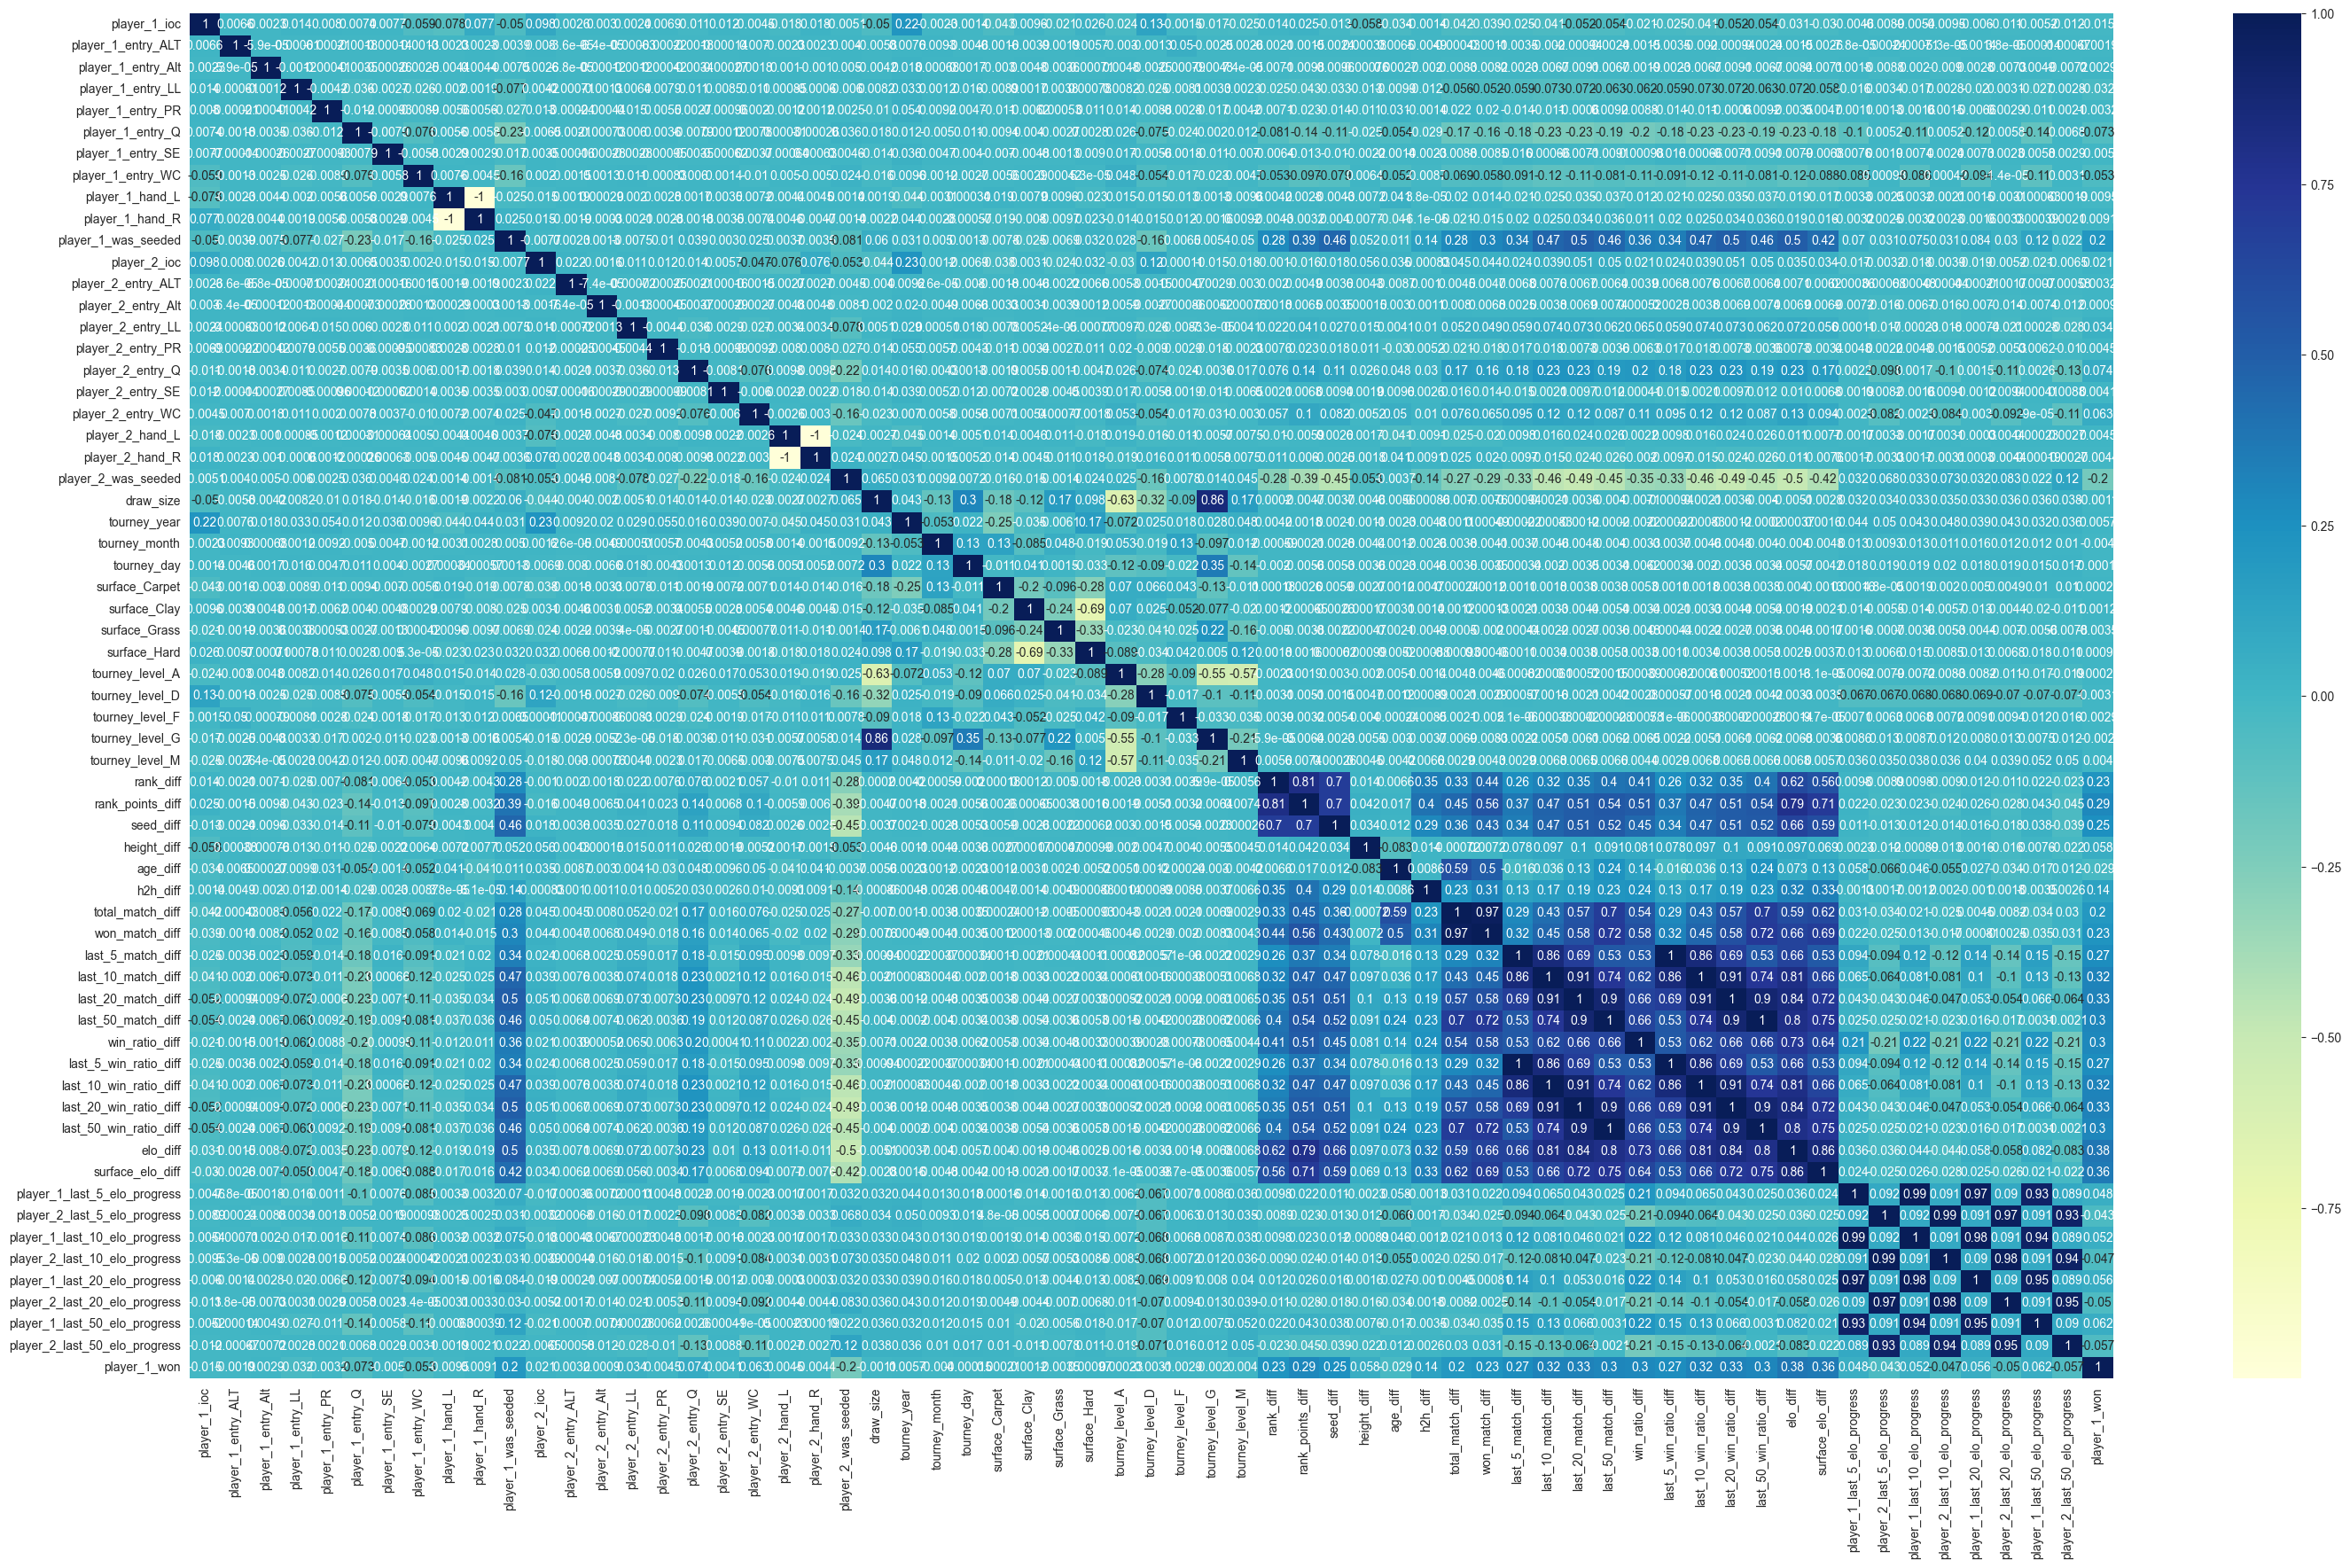

In [47]:
plt.figure(figsize=(35, 20))
sns.heatmap(train_data.corr(), annot = True, cmap = "YlGnBu")

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=42)
forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [49]:
accuracy = forest.score(x_test, y_test)
print(f"Random Forest Model Accuracy -> {accuracy *100}%")

Random Forest Model Accuracy -> 66.05345366192294%


In [35]:
importances = forest.feature_importances_
feature_names = x_train.columns
importance_list = [[feature, importance] for feature, importance in
                   zip(feature_names, importances)]

importance_list.sort(key=lambda x: x[1], reverse=True)
for feature, importance in importance_list:
    print(f"{feature}: {importance * 100}%")

surface_elo_diff: 5.884173394900597%
rank_diff: 5.388567297068046%
elo_diff: 5.209324734087436%
rank_points_diff: 4.642425129629055%
win_ratio_diff: 4.502032380645065%
age_diff: 3.5110800882841646%
won_match_diff: 3.317284018343288%
player_2_last_5_elo_progress: 3.267730550601339%
player_1_last_20_elo_progress: 3.266076943859476%
player_1_last_5_elo_progress: 3.262664607985008%
player_2_last_20_elo_progress: 3.2415281916774825%
player_1_last_10_elo_progress: 3.231275925639157%
player_2_last_10_elo_progress: 3.229998205026837%
player_1_last_50_elo_progress: 3.2279682361351507%
player_2_last_50_elo_progress: 3.2244599947707684%
total_match_diff: 3.129185675107418%
tourney_day: 2.5863243990197895%
last_20_win_ratio_diff: 2.5595914392657018%
height_diff: 2.5476333470397434%
tourney_year: 2.5071320783429543%
player_2_ioc: 2.4304162867595%
player_1_ioc: 2.4043511766137278%
last_50_match_diff: 2.3269596761490274%
last_50_win_ratio_diff: 2.2201314216555965%
last_20_match_diff: 2.07097152022106

In [36]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distributions = {
    'n_estimators': randint(50, 200),
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2']
}

random_search = RandomizedSearchCV(
    estimator=forest,
    param_distributions=param_distributions,
    n_iter=5,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(x_train, y_train)
print("Best parameters:", random_search.best_params_)
print("Best CV score:", random_search.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 137}
Best CV score: 0.6664224916172298


In [ ]:
plt.figure(figsize=(35, 20))
sns.pairplot(df, hue="player_1_won")


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x000001D4D0B174C0> (for post_execute), with arguments args (),kwargs {}: